In [272]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [273]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [274]:
#データフレームへの読み込み
df = pd.read_csv('/Users/rukasumichika/最終課題/data/LengthOfStay.csv')

In [275]:
print(df.head())

   eid       vdate rcount gender  dialysisrenalendstage  asthma  irondef  \
0    1   8/29/2012      0      F                      0       0        0   
1    2   5/26/2012     5+      F                      0       0        0   
2    3   9/22/2012      1      F                      0       0        0   
3    4    8/9/2012      0      F                      0       0        0   
4    5  12/20/2012      0      F                      0       0        0   

   pneum  substancedependence  psychologicaldisordermajor  ...     glucose  \
0      0                    0                           0  ...  192.476918   
1      0                    0                           0  ...   94.078507   
2      0                    0                           0  ...  130.530524   
3      0                    0                           0  ...  163.377028   
4      1                    0                           1  ...   94.886654   

   bloodureanitro  creatinine        bmi  pulse  respiration  \
0         

In [276]:
df.describe()

,eid,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,0.004790,...,10.177455,137.891397,141.963384,14.097185,1.099350,29.805759,73.444720,6.493768,2.123310,4.00103
std,28867.657797,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,0.069044,...,5.353131,2.999669,29.992996,12.952454,0.200262,2.003769,11.644555,0.568473,2.050641,2.36031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,124.912632,-1.005927,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,1.00000
25%,25000.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,135.871062,121.682383,11.000000,0.964720,28.454235,66.000000,6.500000,1.000000,2.00000
50%,50000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,137.887151,142.088545,12.000000,1.098764,29.807516,73.000000,6.500000,1.000000,4.00000
75%,75000.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,139.912885,162.180996,14.000000,1.234867,31.156885,81.000000,6.500000,3.000000,6.00000
max,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,245.900000,151.387283,271.444277,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,17.00000


In [277]:
df.isnull().sum()

eid                           0
vdate                         0
rcount                        0
gender                        0
dialysisrenalendstage         0
asthma                        0
irondef                       0
pneum                         0
substancedependence           0
psychologicaldisordermajor    0
depress                       0
psychother                    0
fibrosisandother              0
malnutrition                  0
hemo                          0
hematocrit                    0
neutrophils                   0
sodium                        0
glucose                       0
bloodureanitro                0
creatinine                    0
bmi                           0
pulse                         0
respiration                   0
secondarydiagnosisnonicd9     0
discharged                    0
facid                         0
lengthofstay                  0
dtype: int64

In [278]:
# 'rcount' 列で '5+' を 5 に変換
df['rcount'] = df['rcount'].replace('5+', 5)
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [279]:
df.replace({'M': 0,'F': 1} ,inplace=True)
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,1,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5,1,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,1,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,1,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,1,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [280]:
# vdata列とdischarged列をTimestamp型に変換（日付のみを扱う）
df['vdate'] = pd.to_datetime(df['vdate']).dt.date
df['discharged'] = pd.to_datetime(df['discharged']).dt.date

# vdata列を数字（YYYYMMDD）形式に変換
df['vdate'] = pd.to_datetime(df['vdate']).dt.strftime('%Y%m%d').astype(int)
df['discharged'] = pd.to_datetime(df['discharged']).dt.strftime('%Y%m%d').astype(int)

# 結果の確認
print(df[['vdate', 'discharged']].head())

      vdate  discharged
0  20120829    20120901
1  20120526    20120602
2  20120922    20120925
3  20120809    20120810
4  20121220    20121224


In [281]:
# facidに対してOne-Hotエンコーディングを実装
encoded = pd.get_dummies(df['facid'], prefix='facid')

# bool型をint型に変換
encoded = encoded.astype(int)

# 元のデータフレームに結合
df = pd.concat([df, encoded], axis=1)

# 'category' 列を削除
df.drop('facid', axis=1, inplace=True)

# 結果を確認
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,pulse,respiration,secondarydiagnosisnonicd9,discharged,lengthofstay,facid_A,facid_B,facid_C,facid_D,facid_E
0,1,20120829,0,1,0,0,0,0,0,0,...,96,6.5,4,20120901,3,0,1,0,0,0
1,2,20120526,5,1,0,0,0,0,0,0,...,61,6.5,1,20120602,7,1,0,0,0,0
2,3,20120922,1,1,0,0,0,0,0,0,...,64,6.5,2,20120925,3,0,1,0,0,0
3,4,20120809,0,1,0,0,0,0,0,0,...,76,6.5,1,20120810,1,1,0,0,0,0
4,5,20121220,0,1,0,0,0,1,0,1,...,67,5.6,2,20121224,4,0,0,0,0,1


In [282]:
# 'eid', 'vdate', 'discharged'を除く全ての列を抽出
df_filtered = df.drop(columns=['eid', 'vdate', 'discharged'])

# 抽出した列の確認
print(df_filtered.head())

  rcount  gender  dialysisrenalendstage  asthma  irondef  pneum  \
0      0       1                      0       0        0      0   
1      5       1                      0       0        0      0   
2      1       1                      0       0        0      0   
3      0       1                      0       0        0      0   
4      0       1                      0       0        0      1   

   substancedependence  psychologicaldisordermajor  depress  psychother  ...  \
0                    0                           0        0           0  ...   
1                    0                           0        0           0  ...   
2                    0                           0        0           0  ...   
3                    0                           0        0           0  ...   
4                    0                           1        0           0  ...   

         bmi  pulse  respiration  secondarydiagnosisnonicd9  lengthofstay  \
0  30.432418     96          6.5       

In [283]:
# float型の列をint型に変換
df_filtered = df_filtered.astype({col: 'int' for col in df_filtered.select_dtypes(include='float').columns})

#　object型の列をint型に変換
df_filtered['rcount'] = df_filtered['rcount'].astype(int)

# 結果を確認
print(df_filtered.dtypes)

rcount                        int64
gender                        int64
dialysisrenalendstage         int64
asthma                        int64
irondef                       int64
pneum                         int64
substancedependence           int64
psychologicaldisordermajor    int64
depress                       int64
psychother                    int64
fibrosisandother              int64
malnutrition                  int64
hemo                          int64
hematocrit                    int64
neutrophils                   int64
sodium                        int64
glucose                       int64
bloodureanitro                int64
creatinine                    int64
bmi                           int64
pulse                         int64
respiration                   int64
secondarydiagnosisnonicd9     int64
lengthofstay                  int64
facid_A                       int64
facid_B                       int64
facid_C                       int64
facid_D                     

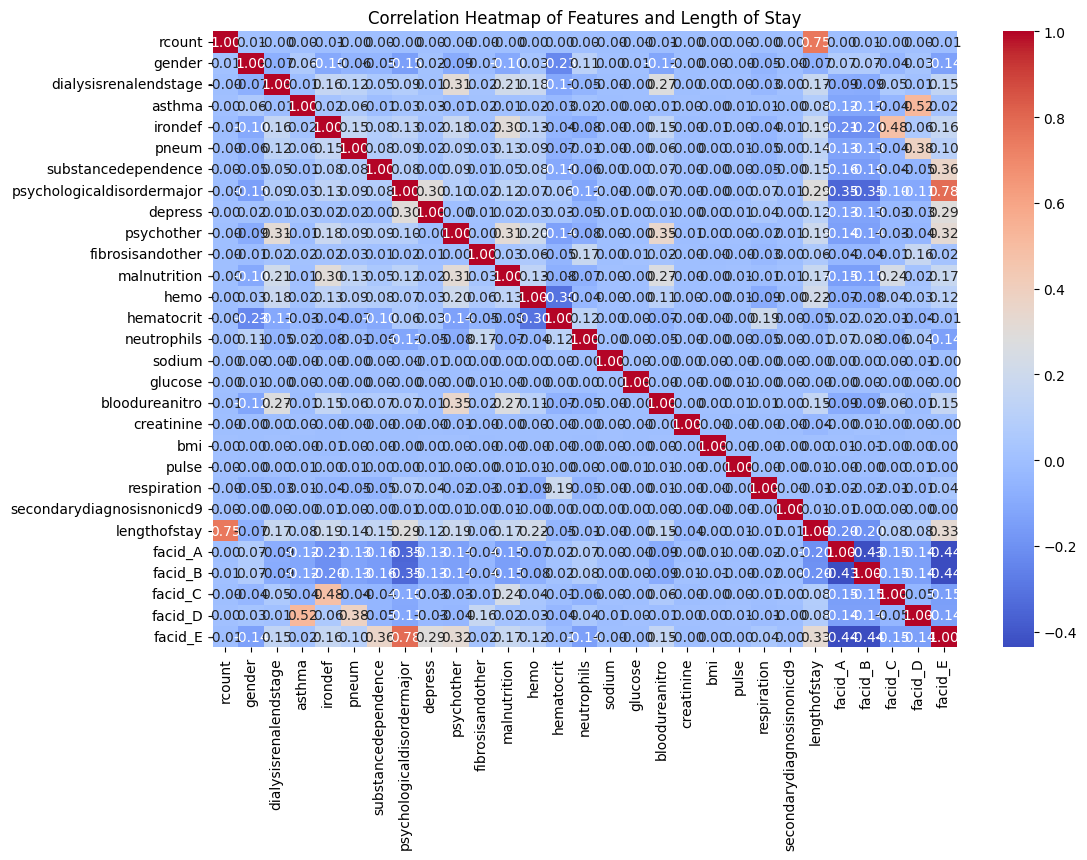

In [284]:
# 相関行列を作成
corr_matrix = df_filtered.corr()

# ヒートマップ作成
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features and Length of Stay')
plt.show()


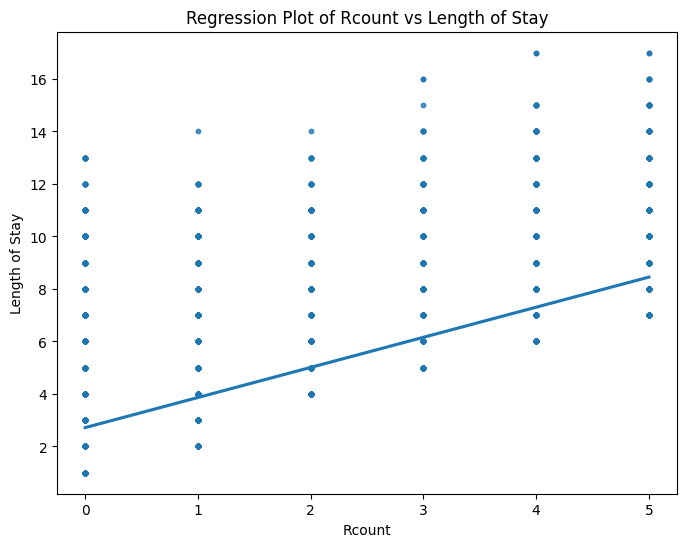

In [285]:
# 回帰線付き散布図
plt.figure(figsize=(8, 6))
sns.regplot(x=df_filtered['rcount'], y=df_filtered['lengthofstay'], scatter_kws={'s':10})

# タイトルとラベルを追加
plt.title('Regression Plot of Rcount vs Length of Stay')
plt.xlabel('Rcount')
plt.ylabel('Length of Stay')

plt.show()


In [286]:
from ydata_profiling import ProfileReport

In [287]:
# 学習データとテストデータに分割
X = df_filtered.drop(columns=['lengthofstay']).to_numpy()
y = df_filtered['lengthofstay'].to_numpy()

In [288]:
from sklearn.model_selection import train_test_split

In [289]:
# 比率7:3で学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(70000, 28) (30000, 28) (70000,) (30000,)


In [290]:
from sklearn.linear_model import LinearRegression

In [291]:
# 重回帰で分析
model = LinearRegression()

In [292]:
# 予測モデルの学習
model.fit(X_train, y_train)

LinearRegression()

In [293]:
# 学習データを用いて決定係数を算出
model.score(X_train, y_train)

0.7610502614408527

In [294]:
# テストデータを用いて決定係数を算出
model.score(X_test, y_test)

0.7632056281708993

In [295]:
# テストデータに対する予測
y_pred = model.predict(X_test)

In [296]:
# 二乗平均平方根誤差（RMSE）の値を算出
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

1.1489116093692764

In [297]:
# 平均絶対誤差(MAPE) の値を算出
np.mean(np.abs((y_test - y_pred) / y_test)) * 100

32.497074011679274

In [298]:
# 計算式の確認
print("係数:", model.coef_)
print("切片:", model.intercept_)

係数: [ 1.14973834e+00 -7.79191060e-02  7.18431411e-01  2.31730709e-01
  3.35410251e-01  3.91192745e-01  5.06100058e-01  6.85998491e-01
  3.80483354e-01  5.61405417e-01  8.33326495e-01  3.50460491e-01
  1.31417618e+00  1.24922419e-02  2.20103582e-02 -7.59528252e-05
  1.05987784e-04  7.70792960e-03 -1.72546342e-01  6.89170906e-04
  5.21322587e-05  3.87084666e-02  4.94917656e-04  2.94208069e+11
  2.94208069e+11  2.94208069e+11  2.94208069e+11  2.94208069e+11]
切片: -294208068715.24646


<Axes: >

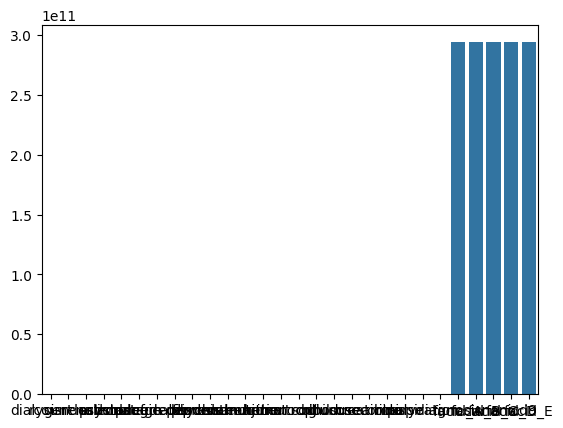

In [299]:
# 各要素が入院期間に与える影響度合い
sns.barplot(x = ['rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'facid_A', 'facid_B', 'facid_C', 'facid_D', 'facid_E'], y=model.coef_)

In [300]:
# StandardScalerクラスのインスタンス化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [301]:
# 標準化の変換モデルの生成
scaler.fit(X_train)

StandardScaler()

In [302]:
# X_trainのスケール変換
X_train_scaled = scaler.transform(X_train)

In [303]:
# 変換前(X_train)の状態
df_X_train = pd.DataFrame(X_train, columns=['rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'facidA', 'facidB', 'facidC', 'facidD', 'facidE'])
df_X_train.head()

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facidA,facidB,facidC,facidD,facidE
0,0,0,0,0,0,0,0,0,0,0,...,0,29,60,6,2,1,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,1,28,87,6,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,29,61,5,2,0,1,0,0,0
3,2,0,1,0,0,0,0,1,0,0,...,1,26,87,6,1,0,0,0,0,1
4,0,1,0,0,0,0,1,0,0,0,...,0,31,84,5,4,0,0,0,0,1


In [304]:
# 変換後(X_train_scaled)の状態
df_X_train_scaled = pd.DataFrame(X_train_scaled, columns=['rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'facidA', 'facidB', 'facidC', 'facidD', 'facidE'])
df_X_train_scaled.head()

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facidA,facidB,facidC,facidD,facidE
0,-0.722221,-1.170568,-0.193962,-0.190244,-0.325043,-0.202333,-0.258702,-0.560059,-0.233968,-0.229243,...,-1.495058,-0.150135,-1.152580,-0.018487,-0.061181,1.526227,-0.655433,-0.222642,-0.216603,-0.665740
1,-0.722221,0.854286,-0.193962,-0.190244,-0.325043,-0.202333,-0.258702,1.785527,-0.233968,-0.229243,...,0.668781,-0.644466,1.161112,-0.018487,-0.547790,-0.655210,-0.655433,-0.222642,-0.216603,1.502088
2,-0.722221,-1.170568,-0.193962,-0.190244,-0.325043,-0.202333,-0.258702,-0.560059,-0.233968,-0.229243,...,0.668781,-0.150135,-1.066888,-1.699167,-0.061181,-0.655210,1.525709,-0.222642,-0.216603,-0.665740
3,0.574156,-1.170568,5.155654,-0.190244,-0.325043,-0.202333,-0.258702,1.785527,-0.233968,-0.229243,...,0.668781,-1.633128,1.161112,-0.018487,-0.547790,-0.655210,-0.655433,-0.222642,-0.216603,1.502088
4,-0.722221,0.854286,-0.193962,-0.190244,-0.325043,-0.202333,3.865449,-0.560059,-0.233968,-0.229243,...,-1.495058,0.838526,0.904035,-1.699167,0.912038,-0.655210,-0.655433,-0.222642,-0.216603,1.502088


In [305]:
df_X_train_scaled.describe()

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facidA,facidB,facidC,facidD,facidE
count,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,...,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04,7.000000e+04
mean,-3.836931e-17,1.829140e-16,3.963813e-17,-3.674521e-17,2.443759e-17,-4.669281e-17,3.430906e-17,-8.445308e-17,1.136868e-17,-5.684342e-18,...,-5.501631e-17,1.782447e-16,3.617678e-16,-2.225014e-16,-6.313680e-17,-4.314009e-17,7.105427e-18,2.842171e-17,8.587416e-17,2.253436e-17
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,...,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-7.222208e-01,-1.170568e+00,-1.939618e-01,-1.902439e-01,-3.250431e-01,-2.023330e-01,-2.587021e-01,-5.600588e-01,-2.339681e-01,-2.292432e-01,...,-1.495058e+00,-4.104783e+00,-3.980426e+00,-1.010257e+01,-1.034399e+00,-6.552104e-01,-6.554331e-01,-2.226425e-01,-2.166029e-01,-6.657400e-01
25%,-7.222208e-01,-1.170568e+00,-1.939618e-01,-1.902439e-01,-3.250431e-01,-2.023330e-01,-2.587021e-01,-5.600588e-01,-2.339681e-01,-2.292432e-01,...,-1.495058e+00,-6.444663e-01,-6.384260e-01,-1.848748e-02,-5.477899e-01,-6.552104e-01,-6.554331e-01,-2.226425e-01,-2.166029e-01,-6.657400e-01
50%,-7.222208e-01,8.542860e-01,-1.939618e-01,-1.902439e-01,-3.250431e-01,-2.023330e-01,-2.587021e-01,-5.600588e-01,-2.339681e-01,-2.292432e-01,...,6.687808e-01,-1.501354e-01,-3.857990e-02,-1.848748e-02,-5.477899e-01,-6.552104e-01,-6.554331e-01,-2.226425e-01,-2.166029e-01,-6.657400e-01
75%,5.741561e-01,8.542860e-01,-1.939618e-01,-1.902439e-01,-3.250431e-01,-2.023330e-01,-2.587021e-01,-5.600588e-01,-2.339681e-01,-2.292432e-01,...,6.687808e-01,8.385264e-01,6.469585e-01,-1.848748e-02,4.254285e-01,1.526227e+00,1.525709e+00,-2.226425e-01,-2.166029e-01,1.502088e+00
max,2.518721e+00,8.542860e-01,5.155654e+00,5.256411e+00,3.076515e+00,4.942348e+00,3.865449e+00,1.785527e+00,4.274087e+00,4.362180e+00,...,2.832620e+00,4.298843e+00,4.160343e+00,6.704231e+00,3.831693e+00,1.526227e+00,1.525709e+00,4.491506e+00,4.616743e+00,1.502088e+00


In [306]:
# X_testのスケール変換
X_test_scaled = scaler.transform(X_test)

In [307]:
# 変換前(X_test)の状態
df_X_test = pd.DataFrame(X_test, columns=['rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'facidA', 'facidB', 'facidC', 'facidD', 'facidE'])
df_X_test.head()

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facidA,facidB,facidC,facidD,facidE
0,0,1,0,0,0,0,0,0,0,0,...,1,31,67,5,1,1,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0,...,0,33,83,6,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,27,76,6,1,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,31,67,6,5,0,1,0,0,0
4,3,1,0,0,0,0,0,0,0,0,...,1,32,51,6,1,0,1,0,0,0


In [308]:
# 変換後(X_test_scaled)の状態
df_X_test_scaled = pd.DataFrame(X_test_scaled, columns=['rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'facidA', 'facidB', 'facidC', 'facidD', 'facidE'])
df_X_test_scaled.head()

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facidA,facidB,facidC,facidD,facidE
0,-0.722221,0.854286,-0.193962,-0.190244,-0.325043,-0.202333,-0.258702,-0.560059,-0.233968,-0.229243,...,0.668781,0.838526,-0.552734,-1.699167,-0.547790,1.526227,-0.655433,-0.222642,-0.216603,-0.665740
1,-0.074032,0.854286,-0.193962,-0.190244,-0.325043,-0.202333,-0.258702,1.785527,-0.233968,-0.229243,...,-1.495058,1.827188,0.818343,-0.018487,-0.547790,-0.655210,-0.655433,-0.222642,-0.216603,1.502088
2,-0.722221,-1.170568,-0.193962,-0.190244,-0.325043,-0.202333,-0.258702,-0.560059,-0.233968,-0.229243,...,-1.495058,-1.138797,0.218497,-0.018487,-0.547790,1.526227,-0.655433,-0.222642,-0.216603,-0.665740
3,-0.722221,-1.170568,-0.193962,-0.190244,-0.325043,-0.202333,-0.258702,-0.560059,-0.233968,-0.229243,...,0.668781,0.838526,-0.552734,-0.018487,1.398647,-0.655210,1.525709,-0.222642,-0.216603,-0.665740
4,1.222344,0.854286,-0.193962,-0.190244,-0.325043,-0.202333,-0.258702,-0.560059,-0.233968,-0.229243,...,0.668781,1.332857,-1.923811,-0.018487,-0.547790,-0.655210,1.525709,-0.222642,-0.216603,-0.665740


In [309]:
df_X_test_scaled.describe()

,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,...,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,facidA,facidB,facidC,facidD,facidE
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,0.008633,-0.011272,0.002904,0.006199,-0.006997,0.002082,0.004556,0.002100,-0.003606,-0.008243,...,-0.002731,0.003107,-0.001569,0.001232,-0.003923,-0.000052,-0.002763,-0.003749,0.002831,0.003252
std,1.000400,1.001734,1.007191,1.015579,0.990318,1.004938,1.008190,1.001300,0.992698,0.982801,...,1.001074,1.003476,0.992810,0.997812,0.992845,0.999994,0.998810,0.991975,1.006222,1.001370
min,-0.722221,-1.170568,-0.193962,-0.190244,-0.325043,-0.202333,-0.258702,-0.560059,-0.233968,-0.229243,...,-1.495058,-3.610452,-4.494580,-10.102566,-1.034399,-0.655210,-0.655433,-0.222642,-0.216603,-0.665740
25%,-0.722221,-1.170568,-0.193962,-0.190244,-0.325043,-0.202333,-0.258702,-0.560059,-0.233968,-0.229243,...,-1.495058,-0.644466,-0.638426,-0.018487,-0.547790,-0.655210,-0.655433,-0.222642,-0.216603,-0.665740
50%,-0.722221,0.854286,-0.193962,-0.190244,-0.325043,-0.202333,-0.258702,-0.560059,-0.233968,-0.229243,...,0.668781,-0.150135,-0.038580,-0.018487,-0.547790,-0.655210,-0.655433,-0.222642,-0.216603,-0.665740
75%,0.574156,0.854286,-0.193962,-0.190244,-0.325043,-0.202333,-0.258702,-0.560059,-0.233968,-0.229243,...,0.668781,0.838526,0.646959,-0.018487,0.425429,1.526227,1.525709,-0.222642,-0.216603,1.502088
max,2.518721,0.854286,5.155654,5.256411,3.076515,4.942348,3.865449,1.785527,4.274087,4.362180,...,0.668781,3.804512,4.845881,6.704231,3.831693,1.526227,1.525709,4.491506,4.616743,1.502088


In [310]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [311]:
# 標準化した学習データを用いて決定係数を算出
model.score(X_train_scaled, y_train)

0.7625847138596904

In [312]:
# 標準化したストデータを用いて決定係数を算出
model.score(X_test_scaled, y_test)

0.7645418737122679

In [313]:
# 標準化後の計算式の確認
print("係数:", model.coef_)
print("切片:", model.intercept_)

係数: [ 1.77395227e+00 -3.33870127e-02  1.37016165e-01  6.38479982e-02
  9.37836461e-02  8.66177441e-02  1.44878536e-01  3.26294678e-01
  8.05877260e-02  1.37564419e-01  5.50036766e-02  6.88053775e-02
  3.41166125e-01  3.44494598e-02  1.15237871e-01 -6.84661235e-04
  3.52021099e-03  9.72131554e-02 -8.10855037e-02  7.94230687e-04
  5.22044870e-04 -1.74479338e-02  9.21848788e-04  2.99158936e+11
  2.99199521e+11  1.38433616e+11  1.35019640e+11  3.01037074e+11]
切片: 3.997376275291582


<Axes: >

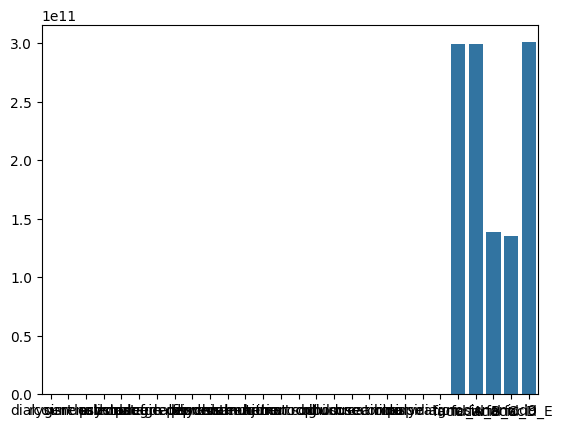

In [314]:
# 各要素が入院期間に与える影響度合い
sns.barplot(x = ['rcount', 'gender', 'dialysisrenalendstage', 'asthma', 'irondef', 'pneum', 'substancedependence', 'psychologicaldisordermajor', 'depress', 'psychother', 'fibrosisandother', 'malnutrition', 'hemo', 'hematocrit', 'neutrophils', 'sodium', 'glucose', 'bloodureanitro', 'creatinine', 'bmi', 'pulse', 'respiration', 'secondarydiagnosisnonicd9', 'facid_A', 'facid_B', 'facid_C', 'facid_D', 'facid_E'], y=model.coef_)